# Sentiment Analysis of Twitter Data

## Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

## Reading Dataset

In [5]:
df_tweet = pd.read_csv(r'C:\Users\Brij\Downloads\archive\training1600000.csv')


In [6]:
df_tweet.head()

Target          Id                          Date      Flag           User  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                Text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew

## Ploting Dataset as per Sentiment Value

C:\Users\Brij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Questions')

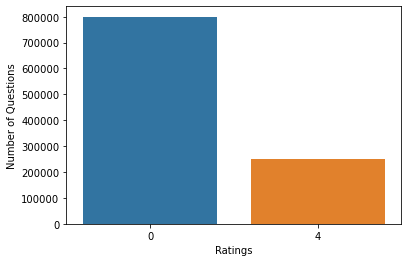

In [7]:
sns.countplot(df_tweet.Target)
plt.xlabel('Ratings')
plt.ylabel('Number of Questions')

In [8]:
df_Neg = df_tweet[df_tweet['Target']==0]
df_Pos = df_tweet[df_tweet['Target']==4]

In [9]:
from PIL import Image

## Ploting Word Cloud of Negative and Positive Tweets

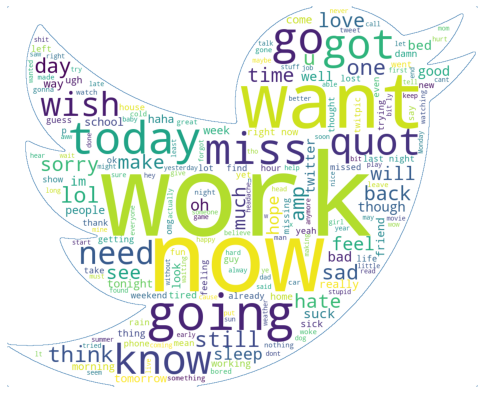

In [10]:
twitter_mask = np.array(Image.open(r"C:\Users\Brij\Desktop\twitter_mask.png"))

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', contour_width=1, contour_color='steelblue', width=3000, height=2200, mask=twitter_mask).generate(' '.join(df_Neg['Text'].tolist()))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Negative-Words.png', dpi=300)
plt.show()
#plt.savefig('Negative-Words.png')

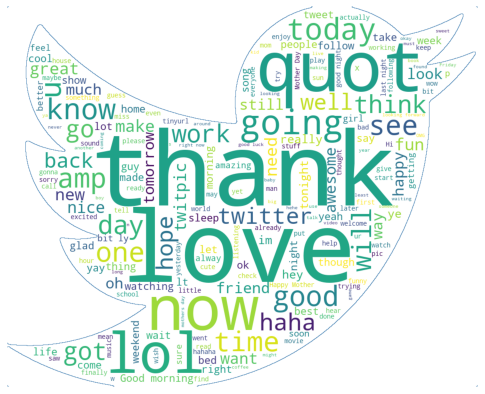

In [11]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',contour_width=1, contour_color='steelblue', width=3000, height=2200, mask=twitter_mask).generate(' '.join(df_Pos['Text'].tolist()))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Positive-Words.png', dpi=300)
plt.show()
#plt.savefig('Negative-Words.png')

## Adding Sentiment from Target Value

In [12]:
df_tweet['Sentiment'] = df_tweet.Target.replace({
    0:'negative',
    2:'neutral',
    4:'positive'
})

In [13]:
df_tweet.head()

Target          Id                          Date      Flag           User  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                Text Sentiment  
0  is upset that he can't update his Facebook by ...  negative  
1  @Kenichan I dived many times for the ball. Man...  negative  
2    my whole body feels itchy and like its on fire   negative  
3  @nationwideclass no, it's not behaving at all....  negative  
4                      @Kwesidei not the whole crew   negative

In [14]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [16]:
import tweepy
from textblob import TextBlob

In [17]:
df_sample = df_tweet.sample(n=50000)
df_X = df_sample['Text']
df_y = df_sample['Sentiment']

## Introduced Subjectivity and Polarity with use of TextBlob

In [18]:
#Subjectivity 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df_sample['Subjectivity']=df_sample['Text'].apply(getSubjectivity)
df_sample['Polarity']=df_sample['Text'].apply(getPolarity)
df_sample

Target          Id                          Date      Flag  \
613119        0  2225244497  Thu Jun 18 10:29:12 PDT 2009  NO_QUERY   
868506        4  1677957688  Sat May 02 04:51:47 PDT 2009  NO_QUERY   
621394        0  2228793831  Thu Jun 18 14:53:40 PDT 2009  NO_QUERY   
1017940       4  1881931916  Fri May 22 05:53:02 PDT 2009  NO_QUERY   
331364        0  2012647794  Tue Jun 02 21:01:58 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
898440        4  1693608029  Sun May 03 23:07:05 PDT 2009  NO_QUERY   
33188         0  1564444734  Mon Apr 20 03:31:20 PDT 2009  NO_QUERY   
553029        0  2203534170  Tue Jun 16 23:57:25 PDT 2009  NO_QUERY   
673930        0  2247638526  Fri Jun 19 19:23:56 PDT 2009  NO_QUERY   
740001        0  2265877337  Sun Jun 21 07:29:06 PDT 2009  NO_QUERY   

                User                                               Text  \
613119    didi_do_da  @jonaskevin homework  why do we need it ?! lol...   
868506         demib  @andyatkinskruge Anyone that have seen my coll...   
621394   NinaCruz927                                No more stairs ...    
1017940   tinalu8889          Ahm.... test, test, one, two, three.....    
331364      willcg83      Another long night.  save me from the madness   
...              ...                                                ...   
898440      DaniScot  @iamjonathancook I can sleep, I'm just choosin...   
33188        karifur  Dogs woke me up an hour ago and i can't get ba...   
553029       Corbana  Dammit got up this morning hoping for a 3.0 so...   
673930      wigenout  @Alli_Flowers But then I would have  to leave ...   
740001      venesssy  is is back after 1 day of not checking her acc...   

        Sentiment  Subjectivity  Polarity  
613119   negative      0.700000  0.800000  
868506   positive      0.508333  0.233333  
621394   negative      0.500000 -0.250000  
1017940  positive      0.000000  0.000000  
331364   negative      0.400000 -0.050000  
...           ...           ...       ...  
898440   positive      0.850000  0.900000  
33188    negative      0.000000  0.000000  
553029   negative      0.700000  0.000000  
673930   negative      0.288889 -0.155556  
740001   negative      0.000000  0.000000  

[50000 rows x 9 columns]

In [19]:
# #Plotting the polarity and subjectivity
# plt.figure(figsize=(8,6))
# for i in range(0,df_sample.shape[0]):
# plt.scatter(df_sample['Polarity'].iloc[i],df_sample['Subjectivity'].iloc[i],color='Green')

# plt.title('Sentiment Analysis')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')
# plt.show()

In [20]:
df_X = df_X.astype(str)

C:\Users\Brij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Overall ratings')

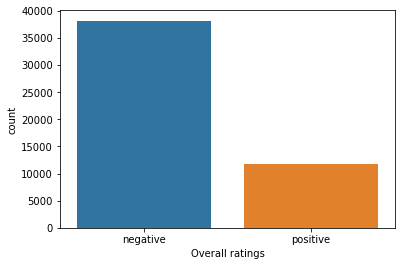

In [21]:
sns.countplot(df_y)
plt.xlabel('Overall ratings')

In [22]:
df_X

613119     @jonaskevin homework  why do we need it ?! lol...
868506     @andyatkinskruge Anyone that have seen my coll...
621394                                   No more stairs ... 
1017940            Ahm.... test, test, one, two, three..... 
331364         Another long night.  save me from the madness
                                 ...                        
898440     @iamjonathancook I can sleep, I'm just choosin...
33188      Dogs woke me up an hour ago and i can't get ba...
553029     Dammit got up this morning hoping for a 3.0 so...
673930     @Alli_Flowers But then I would have  to leave ...
740001     is is back after 1 day of not checking her acc...
Name: Text, Length: 50000, dtype: object

In [23]:
df_y

613119     negative
868506     positive
621394     negative
1017940    positive
331364     negative
             ...   
898440     positive
33188      negative
553029     negative
673930     negative
740001     negative
Name: Sentiment, Length: 50000, dtype: object

In [24]:
df_rev = pd.DataFrame(data=df_X)
df_rev.columns = ['Text']
df_rev.head()

Text
613119   @jonaskevin homework  why do we need it ?! lol...
868506   @andyatkinskruge Anyone that have seen my coll...
621394                                 No more stairs ... 
1017940          Ahm.... test, test, one, two, three..... 
331364       Another long night.  save me from the madness

In [25]:
for i in range(len(df_X)):
        test_data = df_X.iloc[i]
        print(test_data)

@jonaskevin homework  why do we need it ?! lol xxxxx
@andyatkinskruge Anyone that have seen my collection of hats know I own MANY colors - but actually none in black 
No more stairs ... 
Ahm.... test, test, one, two, three..... 
Another long night.  save me from the madness
@LookyDaddy I miss the days when the scariest thing you had to write about was poop on walls. 
  hate u ...  leysh t9ar5 ... =((((((( ..
waiting 4 another job 2 come,,, while im so droop..  and d worst is this weekend im working!  huuuaaaaaaaaa...
Good morning sunshines! So much to do today  But if I hurry through the cleaning part-I get more of the fun! So let the chore list begin!
Just realized that the item I just bought from eBay got sent to school instead of to my house... 
@DawnNicole_xo I'm good with money, but I don't have any to really speak of atm.  LOL!
@jlokantTI Ah. I'm going crazy right now. I need my YT. 
http://twitpic.com/7tq63 - stuck in traffic 
@ianhomer hmm... forecast here says rain tue, wed &a

@MishGoddess  hey...congrats!!  glad it seems to be working out for you and that you have your smile back  
Nadal is out of French Open? Thats bad  #fb
is ALL ALONE IN THE HOUSE STILL  yaya's still not here. http://plurk.com/p/p52z0
haha yeah lindsey that is kinda bad! but he will be fine dont worry about it  im thinking he will be home from the hospital soon
forgot to turn geyser back on when we came back last night. 
@photo_ed Twitcher 
That nap earlier seriously messed me up. Now i can't sleep  Grr.
Waiting for my momma so i can go to Chase and see what the hell they doin with my money. i miss WAMU 
all of the supporters. The people applauding from restaurants, it all makes me want to cry 
is hurting   Please God help me heal my heartaches.
Just had one of the best negotiations with one of Jay's customers.I miss account management 
@meerasudhakar hello  long time.. tried calling you.. realized the number i have is not the right one 
@Tuckerwilson Yeah, I finally figured that out onc

@LAOCfoodie Though I think we ate most of the food, much of the booze went to waste 
movie night cancelled... seems like everyone has a job but me! 
@hexmurda did u see the DM? i wont tweet stuff like that so i cant be more specific 
@TheNolaChick I don't know either. My battery has been givin me problem as well. It only holds a charge for about 20 mins. grrrrrrrrrr  
whyyyyyyyyyyyy?! why decode didn't win best song from movie!?!?!?!? 
Doesn't want to go home! 
@IsabellesTravel good morning  thank you for your travel tips 
oh goodness. Norway might be getting too attached.   &quot;thinking about you...&quot; what to do??
Third row back at Comedysportz  I wanted front row!
@tim_cooke damn drunken conversations 
i converted the climbing wall around my garage to suit my three year old  also working on the garden.  right now going on a bike ride.
Just got off the phone with my best friend.  Goodnight, all.
@acousticraz I want to talk to my dearest but facebook wont let us  boo aunt toni se

Decided not to go to Disneyland  stayin home for my birthday. Hate my friends to death right now
Right... am off to the stables... 7 horses to muck out today 
Hey Talking To Nicole D.Again she is sick thats so sad!  :'(
@cbee Thanks a lot for liking hindi pages.. we plan to come up with other languages too.. but no one in contact knows other languages 
@nicholeone yea i agree, i know what you mean!! tough tough 
@hanako66 i have been dying to see jimmy page live again. &amp; w/jack white! UGH. i could kick myself. ultimate FAIL. 
I'm working a split shift tonight   Open and close!
I was having &quot;EmotionNite&quot; last night. Cried like a baby to release emotions. Now my eyes r puffy. 
my friends are bailing on me  http://plurk.com/p/os5ge
@nickbeaulieu no he's not at E3! He's here with me wallowing in sorrow 
i think i got face wash in my eyes.. they kinda burn 
ANNND, how come when I'm on here...nobody is! Then ONCE i get off, everybody on here chattin'...not cool! 
@stp999 Hell y

@basketkace I want a bbq!  Tomorrow is my niece's first birthday!
@ComedyQueen and cause apprently i am, as i am always checking out lasses, and also she called me a man whore 
@flick_k I've just had the better part of a bottle of wine. I may not be new but i speak drunk good. I love you soooo much! :S 
Why can't I make myself study? I really need to make an A in this class but I'm just not motivated to study 
wishes she were feeling well enough to party 
@24z http://meta.wops.de/twunes -- works, although it's an old version that uses NSTimer.  I'm working on a NotificationCenter version...
from grand indonesia. i start studying tomorrow.  HAAAAAA 
I l00k and feel gr0ss... I can tell im g0nna hav a bad day.  But my makeup is rly g00d. My eyes l00k HUGE. l3 l^ ! T l\l 3 Y   F @ l\l
I'm so starvingggg...old changke nya udah tutup.terpaksa deh sour sally  http://myloc.me/4QFp
sad that I am stuck home sick in bed 
@sgBEAT:bluepirate maybe.  but i don't have very nice cloth and i'm so lazy 

ohmygosh.....i...hate...spiders!!.......  Lol
@sdotspider you know I live in an apartment! But i miss home! Immensly  
@JulieKBarton Oh it was!!! we ate and got kind of happy drinking sangria then walked around, the day was soo beautiful, everyone was out! 
@Karen230683 I was near sick..&amp; to top it all off cause the back door been open all day its like a bloody insect farm in the house too!! 
@ddlovato My little sister looks up to you.. so.. stay good! Haha. But um ya, ur a pretty awesome rockstar 4 some1 ur age  Love ur style!
@rockstardriver We hate to miss a good party! 
@AnaisGalliano Akon killed the best MJ song ever 
@MissErikaT i think imma get fired too....attendance  and ikr i be tryin to be on here but i just dont be havin shit to tweet
@hollywills Sorry for spamming your twitter ha but please come on stage Monday evening at B'ham, still haven't got to see you's yet!  &lt;3 x
@TCardona Why, did you find a babysitter?? And damn, I'm looking on my phone... you did call late

Botak Jones really taking their time in cooking up a Botak Burger! Ha! I guess we can't compromise quality.   m patience for good food.
Home sick today  throat is sooooooo sore.. Go away fluey tonsilitis!
back from washington  gotta go mow the lawn!
We had an argument. But when he kisses me... Fuckin... nothing else matters. Oh boy. gotta go back home. im sad without my love 
about to go play rockband with erin, erin, and kels 
@SiciliaCurves it's not really you that should be apologizing, but you know i love the cupcakes, so i'll take it. 
BAYSIDE BAYSIDE BAYSIDE BAYSIDE TONIGHT! Its been too long (months) since I've seen them.  They make everything groovy.
@emmaarrr you are not relevant to my glasgow train issues though 
@robloveshoney yes! He said she has ruled the roost for 2 long and hes standing on his own 2 feet &amp; it'll b an exciting new chapter 4 him 
@Yunzong we all wish it won't ever stop  #asot400
Hey moon, please forget to fall down  ♫ http://blip.fm/~8lkgh
@phunybuny  

I am either hearing a bunch of muffled whispers or my ears are playing tricks on me. My house is scary 
I am board and there is skool 2moz  I can't wait 2 leave skool lol
just the first week of classes, and its hell already.  toxic toxic!
missed @stealingoneal at the hifi  waaa. they shouldve opened the doors earlier. ah well, see you at your next melbourne gig boys haha
Good mood.  Bad Mood.  Ugly.  Pretty.  Handsome.  The right person is still going to think the sun shines out of your ass 
sitting in traffic   
Slept all evening again, bah. Dentist this afternoon for a refilling  And OMG Natal + Mylo demo on Xbox was AMAZING! :-O
Had fun yesterday, and then it had to end, everybody had to go home, and demi had to leave DX. I miss her already  ..
@AubreyODay wut u want a shot of ma? 
 We're not allowed to wear skirts to work anymore   argh. Argh? Arrrrrrrrgggggghhhhh.
Homelessness tip: lose the honey fedora? 
Gah, now it seems that gpg doesn't work correctly if you've sshed into the b

@shabbygeek i haven't been watching house AT ALLLLLLL, i keep missing it 
god please bring my sister back, i need her 
Byebye..  Wow this sucks
@kirilouise I do appreciate everythign  the place looked great and thanks again for everything.
Waiting for the Denver game to come on.. but i dont think their gonna win it  Lakers suck lol :p
@RobLane good good. I'm ready for my closeup.... 
Wishing I was listening to Imprint Live but it's all good, game night! I am losing. 
@elwoood she replied again!  teehee
@Dublins98Dave Ah bless you squire, thank you 
@inetespionage facade always puts me at my empty azz facebook 
@ameliabu haha, my bad! I'm still gonna picture you running around the ice rink. 
@victoriafoglia im gunna steal your tan tan tan some how how how 
@XxDREAMZxX Sorry....Boston's headed home 
@sandigrr34 my tivo didnt record my weeds    
I hit a baby when I was swinging  parents need to take care of their kids more D:&lt;
boredd as... watching twilight  
Gah! No bread! And worse s

@Dee333 Same here! LOL I'm also goin on a wknd holiday next wknd to Ohio. No new stuff 4 me tho. 
@dnr1979 love you!! Thanks for cracking me up on this yucky day 
Work? Really? I was just there 11 hours ago 
off to work 
@IM_NYCE @pat_bulatao just woke up  feels great thank god I AINT OVRSLEPT or HUNGOVER, how wonderful to have a day off! sux 2 b evry1 else
@Aimie94 oh, i saw that at the stores. and actually as the sales girl if i can buy it. but i cant its for display 
i keep deleting the DMs and more appear. I'm really sorry all .. i will NEVER use it again!!  #twables
Damn no upgrade  At least i got an aisle seat, not too many fatties getting around the airport....hope thats a good sign
@cole_mc Working away...My job sucks lol...the restaurant is always SO DEAD!!! Other than that I'm great! How are you? 
Photo: http://bkite.com/073DW - Even though Kogi was a PHAIL, I came home to two good things. #1: my special order shoes arrived. 
@webponce They say its good to keep busy. 
Another

@brihana25 I know I've been following some of it too 
Siiiiick foot tan again  getting wa-uh.
is really hungry after not taking afternoon tea to work today 
@thenoblesavage We have similar neighbours! Had to watch a toddler being hit hard by an adult yesterday. Shouted out the window to stop. 
I miss this guy   http://yfrog.com/5ftmqj
Talking and listening to music!! 
I am so sick because of yesterday  why does this have to happen the first week of summer? FML.
Ive spent too much time on the computer already.. .no more procrastinating.. The dishes must get done   perhaps i will sync my ipod 1st
Cory is breaking my longboard 
Its the last tan at tiki. Many memories since 2004  taaaarrrrraaaaaa
  side tracked.  gotta get my focus right.
I'm gonna be home alone all day tomorrow  come entertain me! 
@serenahockey no not really, I might have killed the yeast somewhere along the line or not given it enough time/good condition to prove 
Omg im gonna miss the hockey game! Im so upset! 
's tryi

@anthonybliss it was a right twat!! 
For once it's I that can't sleep 
WTF I'm coasting down the 405 listening to keyshia Cole stylin' in my members only and it's raining in the Valley 
@defyingravity16 So sorry ... Just saw your message. Phone issues this weekend so I haven't been checking in. Tonys were tonight. 
@molliemoo2  morning!!! 
*sniff* probably wont be able to come to Bits and Pixels in June - its Dad's 50th with a party and relatives from qld visiting 
@Sam_Symons Aha lucky! Its 11.30am here, got ages..! 
hates the fact that it is 74º outside and yet again has to spend all day inside at work..  booo
Divine road-side-stall fruit, amazing fresh apples, mandarins, gripes, cashews and macadamias  next up fresh oysters yuummm!
twitter is my only friend now  gosh i sound pathetic. HAHA. but yeah, boreeed. can't sleep 
5:28am - just got out of the shower, inschool today agaainn! 
damn, i've got the hiccups 
is looking forward to the weeks ahead 
im boredddd  its really cold in my

we have been in touch with Twitter support... still no luck with adding our background image 
Federal Student Loans are retarded. Stupid PIN number didn't work.  Will be living in Dillon 116 on August 29.
@Aaron2AJ  probably be a while before ya come back too huh
song writing fail. 
Ready for Eastenders - going to be a good one!! .. Then the last BGT Semi Final  .. FINAL tomorrow night though  Exciting stuff...
@purpybunny aww pp seriously? haaayyy 
Okay ... I'll shut up now and leave everyone in peace for a few hours (except for mobile tweets, maybe). Off to work now 
just got done mixing the band for GZ tonight. Sounds good. IC tonight, should be amazing. Im going to miss this place 
Ok, back to the piling notes 
the other fun people to follow  #followfriday @shahpriya @aalaap @Shadez @Reema226 @jowyang @sushmeet @mayank @hiyer
#Halifax #MetroCenter #CirqueDuSoleil how many of you Haligonians on Twitter made it to the Cirque show(s) this weekend? I Didnt 
I have a headache, a headach

Still about half an hour left of school. Spending the time listening to TRL and enjoying my last class with Kelsey. 
@aplusk loving how u always reply to people  very intresting
ive been in pjs all dayy, being sick suckkkksss  but now watching The Goonies! epiiicccc
 work today...oh well, only 2+ months left!
@carlysialevert heyy ! what r u up to?!! you called me the other day i txtd u bk but u nvr replied! 
think i should trade. i wish i never got the sony ericsson c905  good cam...that's it.
watching return of the jedi. badass. 
What? AlwAyS weB c0nNeCtIoN tIme0ut? OhH n0o!  hehehe! GotChA!
@terrideboer You have computer problems because you have Dell's. If you had Mac's you wouldn't have any trouble. 
@Jspringer23 aw we all do  smh but wat ya gonna get n2
Dear Lord, I'm sore.  I think I pulled every muscle I possess yesterday. I'm only comfortable in the fetal position! 
just hating this weather...... nothing you can do about it.. 
Thank you sidewalk for jumping out and biting the t

putting eye drops in my cats eyes, trying to make them better 
@onthebound85 Ew, that sounds so... real world job-ish... 
@Woth2982 I was worthy of being loved...he showed me I was from the first day, if that makes sense......   So it just hit really hard..
@ddlovato madison is the cutest thing alivee. she doesnt need to be frustrated over paps  im sorry ur sister has to go through that&lt;3
@sushmeet totally buddy.. that match made monday morning blues worse  #t20
On the 24 heading home!!! Didn't dress warm again. It's cold 
@pbfundamental I used to go with some friends who were affiliated with the bowl - our car was first in and first out. Never happen again 
Got super glue all over my hands 
@TosynB sorry boo  who's wole bucknor?
@xbron nuh i doubt it  they will be amazing in a few years like MCR hahaha
@Roshelleee THERE WAS A RAINBOW?! I missed it... 
Traffic jam at woodlands checkpoint!! 
what a sleepy day, have work in a few hours 
@jeffgrant Grrrr. I really wanna play it.  
@Zar

@timjahn i almost got a PA gig working the comedy showcases! i couldve been at the George Lopez show for free! 
10 day forecast. showers, rain, fewer showers, showers, t-storms, showers, isolated storms, showers, scattered showers, scattered showers 
@Rese_Piece Oooh, hmmm. Yeah, don't know about that then. If you can't find a solution in the troubleshooting hear then I'm stuck too 
got a sore throat  DEAR IMMUNE SYSTEM, pleaseeeeeeee fight this oncoming virus!
@yayjen haha nice  my dad did that 4 me 2day w/ green beans.ick
still gutted i never had the balls to go tell @anniemacdj how much i love her at rockness  il jst txt the mashup on friday me thimks?xoxo
@onefellblow 
@thenewmrsb2005   What's the matter? 
ahaaa, sun stroke now  my eyes want to go sleep but nothing else does 
@jack Duvel and Dark chocolate ... sounds like belgium 
@GoldCoastDiva First the Nuggets, now the Cavaliers! Aww man... 
Bubbly - Jason Mraz....song of the day for me  totally loving havin 25 degree and the SU

other half already home from work. didn't actually get to work - migraine hit hard b4 she even got there 
While tidying I just found 20 dollars in dollar bills my Dad gave me at Christmas. FAIL 
is miss my brotha  http://plurk.com/p/ujt05
Ah! I want chicken selects with ranch sauce 
I want an ice lollie 
I have a feeling this is going to be a long month of fighting the state &amp; insurance agencies to keep my son's services going. 
@89theBrainchild --lmao fcuk! I've always had a prob with following the crowd I swerve 
this weather is amazingggggggggg 
Setting up our twitter account 
Hold your own, know your own, go your own way!!...  
Painfully slow night, made more painful by a serious lack of sleep 
I am going so overboard at the grocery store that I know I'm going to regret it later. Prolly at the register 
I'm coming home! 
Cousin keeps crying and whining gahh 
@HighTechDad I think that's what happened. I knew getting it early was too good to be true!  
Cleaning the house 
Make ea

@loganaw well haha i was goin to say that you were being awesome and rocking some plaid pjs. the shirt is cool too tho 
Hi guys!  I have been dying to Tweet you........... and now I did!   @collective_soul
I'm not sure about this twitter thing. I don't like these people I don't know trying to follow me. 
@ElisaMariee that doesn't make me happy 
@mike_mcalli ....or a pipe  as I'm doing right now. On the porch, enjoying the cool night.
is off to celebrate in the sunshine... first major hurdle over 
morning twitter 
@lecheval Eh.  Could have been worse.  I expected something or other!    Thanks tho'!
@MrsLoulou I was hoping they were going to announce the end of the show (to save their marriage)... 
That's the song/video i needed now  http://bit.ly/2g1fk ...&quot;wicked n wild ... inna Berlin style&quot; 
is almost done with her work week, 3 day weekend, here I come!! 
so bored ppl x hate beeing ill x 
Blah -- back to the grindstone. Much harder now that I have to leave my 11 week old wit

LeBron was tired u can totally tell by that he only got 25 pts., his attitude, he was so TIRED!    :@ :-S  :$  :'(
need a glass of cranberry juice 
@richotoole i didnt even get to say HI to you the other day 
Is it the weekend yet? I'm looking forward to spending time with my wife on Saturday. It will be her last weekend off for a while. 
@randommanda &quot;You're so vain, you probably think this status is about you, dont you, dont you ......&quot; 
My unlce died today 
@JoonyaT - also heard great things about the kodak unit, cg10 has a better screen and I like the feel of it but image q and sound - 
does anyone wana write my letter of application for me?? big me up some what?? its too sunny to work 
zomg! real firefox 3.5 with new icon! i... don't like it 
&quot;you have stolen my heart&quot;    ..sum1 cheer me up ...bad day ((((
I'm so bored.  i hate my hair. I still can't get over it.
My hair is getting too long again. 
Why does Demetria always have huge life revelations via Twitter

owwww the hamster bit me and i did nothing to it  x
Gettin ready for Nicola's party tonight  yep its just under 3 hours away bt my hair takes ages to curl! hehe :-p xx
Its hot and the cars aircon is screwed.. its gunna be a loooong journey 
is looking after her nephews and shes tiiiiireddddd  lol eeeep for kids of my own! xxx
@Rkenney6 boo  at least you didn't put your computer in there right? hope they get it to you soon! ooo maybe you'll get captain hook!
@AshleyyU I want to goooooo! 
all live, time - work, when time for love, friends meeting party or hreat hardcore concerts 
its finally the holidays! drew an art piece kinda like a card with jamie.. talent doesn't fail me! 
I feel like crap....again...and its my birthday 
So. Much. Traffic. 
mtv movie awards and lauren's last episode on the hills 
listening to placebo always makes me realise how much i miss my ashtray girl. gonna listen to asteroids galaxy tour instead 
I can't help myself watching 'reportase investigasi'.. That's to

My rabbit just died, right in my arms, while I was giving her a bath  I'll miss her...
...why did I wake up at 8am on a Saturday. WHAT THE HELL IS WRONG WITH ME. 
@Shedletsky Did you like my testing place? 
@lars_crystal Need a photographer?? You tease!  
No one else is awake 
Is in Nice and the weather is glorious, but thinking of the crew, pax and their families of the Air France A330. 
@indiekuri you tell us 
Wish I didn't have class tomorrow and could just go lay out by the pool   I need a tan....
@richardpbacon Much more fun to be had at Mansfield shopping outlet village on a Bank Holiday than watching nasty boxing. 
@ThinkInStereo   I want some...  Stupid allergies
no more rain pleaaaaseeee 
@Ricardo3G  I think so too
@tbossbone same  I cut my finger right through the finger nail with scissors *cries*
@Ace6one7 Great seeing you tonight hun.  Let me find out you can dance Ace   lol.
@JoeysAngel oh nooooooo I hope he was joking 
Just wokke up to hot chocolate 
@abbuck  siiiiiiiiiii

Wish I could go hear Mint Condition tommorow night 
Aww, it ended already  Haha, it was cool though =D
@rachr21 yeah, me too. 
@AddieBef Lol  I was wrong then ahah, you were supposed to wrap it up in that nasty goo thing.
santa cruz was soo fun yesterday.. But now i'm bummed i couldn't sleep in 
@SophieLouiseJ I has people from school too! 
People try to grow up so quick. I say take life day by day 
@ElvisHsiao You can go to www.TwitPic.com and log in with your Twitter details to add pics 
@Keshia79 bored....and he's sleep and nothin's on tv 
@davinafaifer mac is my beautiful cat who's very sick. Found out today that he's got two more tumors and he's having surgery on Thursday 
@sdhanlon Hey Siobhan!! This is new to me too. I'm not sure I get it either. Everyone says it's fun, so I thought I'd try it... 
Great. @MitchBenn says I'm nobody. 
owww god, drop by 1  21. sulumitsretsambew-id.com
4) La Primavera by Botticelli *whew* I think I left my heart, sould and mind in Italy--some1 go an

Painting... 
&lt;- wants to be drunk making music 
Just got through talking to Jen! Miss my lg girls.  
Isn't having the best day today 
six flags was crazyy. I brought 60 dollars when I arrived but when I left I had only 1 dollar 
@kymalicious Dont be too jealous, I got baked while i plowed the land  Now that the products are in place I am back in business ;)
is sad to have just found out that rob lowe does not in fact have a twitter 
the weather outside is so deceiving. it's cool and breezy, but i come back and i'm drenched in perspiration. 
@solyd @cooljean I miss you guys so much I wanna cry 
Oh Daddy I Miss you so Much...   ♫ http://blip.fm/~8lwws
I Give Up, I'll Just Not Upload Photos 
ohh s**t... drop by 1  70. wabuf.com
On my way to school in about less than and hour  i don;t like school seein' as i dint do my coursework mwahahahahha! 
@kinndle Really?? I've used Safari 4 before, and it always closes by itself.  I'll try Google Chrome. Thanksss!
Quick workout done. Now off to U

@KDEE47 I'm jealous every time you mention drinking and Ames.  
Thanx @Maserati_holly @SavyBoss @IshSoWavy87 but i still only got 72 followers  RIP Me 6/23/09
@RaiscaraAvalon I am currently DD &amp; DH free &amp; anxiously awaiting the start of #TMMM  How bout you?
Im confused don't know how to use twitter... 
@fhnixon hey I seen yall w/ hollywood undead at lavela it was UHMAZIN.....I wish I could have met you but oh well I luv u guys&amp; ur music 
I need to convince my dad to buy me the Russian doll name necklace from @ladyluckrulesok  I love it.
Having taco bell with Chris and watching &quot;The Illusionist.&quot; Wish I didnt have to work in the morning 
wants to know how to trust his boyfriend again... 
@JohnLloydTaylor @Jonasbrothers Have fun and be careful! 
feeling sick... as if i was hungover... as if i just drank 10+ bourbon n cokes... sucks! and can't sleep 
just got home from Sheri's wedding, very cute. congrats.. but what a wild ride to get there.. my poor car 
@kevinellio

is taking her sissy to college 
@fourpawslover I hope the twins graduations are on different weekends so you can go to both. Would suck if it were on the same weekend. 
@Bosun_McShiny yeah, when may hits it's always colder than April, and so on 
Watching EastEnders Revealed while eating chicken noodle soup. Going to get upset all over again re: Danielle &amp; Ronnie. 
This is so '06 but... Fuck AWAs. 
@Naina been thinking any changing my workspace lighting too, can't decide what will work tho 
@DJBigApple the suns trying to come out here in wellington, nz, thick fog and freezin 
is prayin for refreshing for her friends. you know who u are!  
@devinewilliam haha i just want to live in melbourne, not study there. noo i didn't even get myself any krispy kremes 
Just bailed 1/2 way thru a dinner with fam &amp; friends--dining with a toddler is 0 fun 
Still curled up in a little ball like a potato bug after dealing with Unemployment Office Nazi Robot this morning. Bureaucratic bullshit! 
Th

@mitchelmusso  Ohh,,, sorry Mitchel  Maybe next show is going to be better ok? LoveU!
@FeriaSpicePower And you hon.  BTW Empress nearly finished 
@Dezz_MCR  are you following that account?
@monicananz i hate you 
@amazingbianca I won't be there  but I'll be in NY some other time so we still should all link up!
Okay, first con about TwitterBerry: I can't click on links.  Or can I? Am I missing something obvious?
Sat on a bus in traffic in miserable weather! 
is soooooo saaaadddddddddd they cancelled &quot;The Game&quot; It was one of my fav tv shows!!! 
Is at Ian's... Wow these little girls are so freaking bad. Ugh! D-Now was great this weekend, sad but happy it's over 
Sitting here watching the food network chanel Yahoo  lol lol there has to be something better to watch
Bbutton ring fell off  needa replace one asap: Bbutton ring fell off  needa replace one asap
should not be up this early to go to work but sadly i am 
@mileycyrus http://twitpic.com/2xcwa - awe. how cuute! mine were....

im pretty convinced victoria broke my little toe. it hurts so bad 
Bought Ciara a Muppets movie tonight, she loved it!  Cool points for Mommy. I wish everyone a GREAT week. xoxoxo.
@ItalyJames I don't know. I think the brain needs sleep too. 
@stephenfry Please remind me why Norfolk is fab as its abit wet at the mo &amp; uninspiring  Presently in Suffolk driving back home with kids!
Just got in at work. Need caffeine. Robot vs Monster -  http://twitpic.com/7mr66 - innocent wombat caught in the middle. 
@witheyesthatsee I just realized that I sent you a comment earlier, but you didn't get it because I missed a letter in your name.  Sorry!
@Pharaohciously ok ok came to work..  I was not having sex.. rofl 
I really like that movie &quot;Taking 5&quot; 
@alagappan_nitt i ll be off to banglore..  .. u going to tht ???
can not believe it has been a month since I graduated and I still don't have a job 
Why am I wide awake on the one day I'm allowed to sleep in?? 
#shoutout2 my mommy, shes sic

I wish i could see Madonna in Europe this summer 
I need a nap, and I'm not going to get one.  
@TeamUKskyvixen He's scary... Me no likey.  
Okay, I stop being a sick freak.   I'm sure I'll find a nice little game with kittens and butterflies... 
@xoxoroo oh no   I've been having problems posting to Blogger today too, hmmm...wonder what's going on?
@superjeans I agree about Transformers 2- was just lacking, even if it was funnier. Shame. 
@DkW_2023 having fun? havent heard from you in a while 
@Veronica really I feel sad 4 u 
@yesssPecan thanks Hart... though my run tracker messed up on me.. 
realized that when laptop was stolen I lost mp3s of my pet psychic sessions for dead dog. 
glad my headache is finally gone. NOW i need to go grocery shopping 
@Mechanical_Mind I get most of the errors when I switch the bloody thing on! 
F**K! drop by 1  21. yehia.org
my family keeps laughing at me for having a voice like a frog 
@Rohitdass that sucks. do you have a gf? u need freedom!   No, I don

i want my neighborhood to be like on that 70's show. some cute girl needs to move in next door, and I'll be Eric. Wheres my Donna? 
@KimmySzeto i don't know!!  It makes me sad. haha
@davidwhittam Morning love. Another load o' films to watch@wkend.  @The_Arn is right. Japan is wonderful. Let's go next year.
@dphotography Up since 5am. Sunburn very sore 
dear twitter anuhea, jessica, and dpk say heeey.  We're drinking. And On a mission! We will not fail. Lol http://tinyurl.com/cwbybk
Sat at home doing nothing but phone watching. Wanted to see star trek but everyone's boring this evening. 
math homework...formeln 
wow my nub cameroon is about done - smoked WAY too fast I guess - only gonna last about an hour and 15 minutes 
@Moe_ProfyleNupe uhhh I had to work too 
Woke up cz I 4got to buy Powerhouse tix...f*ck the special is over  back to regular prices :-/
@donna_de do it do it do it! hehe.. i love coke!!!  well diet coke!! the real stuff is too sugary for me! 
@_MikeNewton_ DM back!!   

@SimonFilmer but i now have a very boring grey colour where once there was pattern &amp; bright colours 
*sighs* still have review classes tomorrow 
Has bronchitis 
@Miss_Melbourne thank you for the #ff recco much appreciated 
Feeling like shit yet again. I feel like I been sick for one month straight this really sucks mannn 
@lovejamieo not you birthday boo!  Haha no one you know someone from school  super lame.
Just said goodbye to little Eva...so sad  
going to north carolina next weekend...grandma's not doing so well 
Good day gone horrible. Watching &quot;Seven Pounds.&quot; I need better friends. 
@gezinator Oh no, Gez!  Hope you finish up soon.
Just saw the last ep of the first season of Fringe. It ends in a fantastic mind fuck of a pull back scene. 
Just passed a national express bus going to London this time last week that was us 
heeiughighieheai, why did my mom have to pick me up so early so I didn't get to see him after school 
man. me n the girls shulda went out. we anit e

it's just a boring evening 
can't believe how awful the cheesecake tastes!  Poor dad will be too nice to say so as well!  Also, oh god that certain person's back!
Nothing's gone right for me today.  wanted to work around house and pressure washer busted and all drills uncharged. &amp; blew fuse can't fix
@TWCWeekends  Good evenin Steph and Kim!  hope yall are havin a good evening ... even though you guys are workin on the weekends  bummer!
@spinurwheels we missed you last night 
Grr,..have to be out with the parents garage selling...on top of that I'm sick as hell 
@boxofchocolates especially retrievers, their life span is around 10-13 years. Enuff 2 fall madly in love b4 u lose them!    #dogs
Good night all 
sister's 5th grade moving on ceremony  exactly the same when i did it 10 years ago. snap.
One of those songs that make you realise how good things are  ? http://blip.fm/~69176
@kellixo you know, she doesn't need a visa to visit italy... ahem. only lots of $$$! wish she could come 

@emzbulletproof sorry i did my best 
is gonna stay in tonight with some movies and some Gambino's 
@rebeculla @rebeculla thanks!  just downloaded it, no work today so plenty of time to enjoy   #followfriday @rebeculla
@MarieC09 My right ear's been blocked up today  bit like when you've got water in it. Any idea's 2 clear it? don't like putting liquid in
@Mbicesk8r When does you're skool end?? 
is it Friday yet???? 
@joeymcintyre Just sayin' &quot;hi&quot; - hope that you are having a good weekend...  
@Sznq heh - fame and celebrity a refuge for look at me narcissists 
Oh @kbarstereo, I'll miss you tonight.  
nobody wants to chat with me 
I am back from the best party ever 
Got the (non-swine, I hope) flu.  Going home.
watching cmt awards!!! sad kenny chesney isnt on it!!! 
I wish my second monitor didn't break!! My work flow has slowed down so much since! 
nursing my broken black and blue toe  ouch... http://twitpic.com/4w1c7
#followfriday even though its sunday @wonkybonkers so she ge

this dumb phone jus woke me up cuz somebody wants to dial the wrong num 6 sumthin in the morning  o well back to sleep i go
@katielharper noo  im going home to nor cal again 
HEy LAdies if ur still up and u didnt go 2 the club 2nite... Here is a song u can dance 2 http://www.zshare.net/audio/55259468c5cd3eff/ 
It feels like... Wednesday.... Mais non 
@mpalms we thought about it, but between moving &amp; all of our craziness, it just doesn't work out 
i hate my fake smil so much 
@gossipgirl wish i could audition 
Catavino, is shortly going to become Catamedicines if this damn cat flu doesn't give up! 
My little boo is sick 
is leaving now. irdk when I'll be hoome, so no tweets it's sad 
Getting eaten alive by mosquitos 
part 1 of the day is done! now gotta go to work for 8 hours! 
(lol) Waddup?  http://plurk.com/p/ro5nh
@RockinChick09 so... what do u think he'll do then cuz all i think is hes gonna hang up!  lolloll
Twitter is evil. It has made me forget about Facebook and keeping in t

@invebobby *awesome* except for Drop Down Menus no longer working in Safari in 99.9% of all web sites 
my 6th wedding anniversary today... so lucky to have such a gorgeous wife 
i missed larry king  and i heard @jonasbrothers admitted having girlfriends! watching it as soon as in comes up on youtube...
im toooo warm 
Is on Twiiterr  yaay. I dont know how to use it though. :/
Oowww...sore throats hurt  
Damn my baby phone went dead and he can't charge it bcuz his power still out *ugh* THIS SUCKS!!! 
Is it friday yet 
Is mulling over this bad weather 
Good morning! Feeling a little sNaRkY this morning.  How are you, you, you AND you?  
 goodbyes are hard.
@arabsodmg  im in love with that baby ill be home tonite i bet tha guys lik it too they jus don wanna sound homo hahhaa
My birthday today!  was hoping to be woken by a kiss from @jennifalconer but it didn't happen  
ugh !!! still confuse about my course in college!!! please give me some advice... 
@mileycyrus .i wish u knew who i was  m

wish people would stop coughing near me  so scared i contract swine flu nd i hate being sick 
There we go... apparently I wasn't properly setting the DateTime from a Twitter response before.  Need a test for that!
Dnt ask me why im doing this. I miss too much.  - http://tweet.sg
laundry laundry laundry mother fucking laundry i want a sandwich. and my babies. 
@sadeduh yayyyy!!! Have fun 
@OoOSilvaOoO Flute xd (via @Mikolak28)hehe, we had to learn how to use it in 5th grade and violin. Bit was good at neither of them 
@agentdoublelYah youwere Alex's best friend!Do you still talk to her&amp;live in Midlo?Im in Japan but moving to NC 4 senior year rly soon 
Getting ready for another exciting day of work...NOT  Save me!
I love waking up at 4:00 in the morning  for work  excited for tomorrow though!!!!
@stashdrawer IT'S STILL SAD.  but then again, they're millionaires so it won't be that hard for the kids to survive lmao
...is it friday yet?  just passing time til then
@TomFelton hope it go

@nirrimi think that's bad?  i use google alerts on my name  http://www.google.com/alerts  geeeeeeek!
Not Feeling well today  Just going to do some Textiles work!!
@BeautySchooled nope i was a day late for the return policy 
i think the best part of miami is the beach...so relaxing 
you can't follow yourself?  dayyummm.
/vent: hurts to swallow 
fell down the stairs and is in pain! 
@lonelycrowd I already am! Where did the rain go 
Wish my luck would turn around! 
That dress... Sigh, I guess it's just not meant to be  http://twitgoo.com/mhiu
@coreyownsme: I'll be doing homework most of the day so I feel your pain. And andrew won't be here all day since he is working 
It's raining 
has an addiction to this song right now! http://bit.ly/14HEzk  beautiful 
Why would i d-load an app called the &quot;Moron Test&quot;... its inevitable it will label me a moron 
I totally said &quot;ah did as&quot; instead of &quot;uh dee dus&quot; LMAO! Wills still laughing @ mee 
cant sleep but im still feeli

I'm channelling my inner meerkat, listening to Radio 1... Work in an hour... 
@shinyobject No kidding! My friend is going to the Zoo concert to see the B-52's. 
@misstwinkle yey! Thinking I should start a word of mouth affiliate programme  ocado and twinnings, you owe me....
@tobywankenoby nope don't talk to me u didn't come 
@chromette lol, my birthday is also voting day for the daylight saving referendum, and i get to vote! voting a big fat NO btw 
@MissKatiePrice I read ur having quickie divorce  Is it true  pete come round! My sis use to bsit his cousins in croydon! V long ago! X
feels like the luckiest girl in the world. 
left my cereal at @moochoo's 
I feel sick  you think I woulda learned my lesson the first time.. Thanks alot costco!!
uuuuugh i still have a caffeine hangover... 
it's starting to rain... 
the episod finished  n my chips n coke 
Regretting the three cups of coffee ealier this evening - can't sleep 
Spoiled Emily's awesome saussage/pasta thing 
nerf herder-gotta l

Someone came by to test drive my truck. I'm going to miss her. 
@countessmandyec I will spill no beans about LOST, I promise!  I'm going to re-watch it because there was so much to see!
Mmm these Mikado's are so good 
it's Julie's last day in the office before heading back to the UK for good  Cyprus will miss her.
@celina_glez hey me too arggg 4 am 
I have a shirt he wore and have it right here next to me cause it still has his sent, so I can fall asleep  I miss him, I can't sleep
hmmm... I dont know what to do 
has 2 tickets to canada's wonderland and no one to go with 
@CalebFTSK  only people like trace cyrus get FACE tattoos 
@lizguera that shits gine 
@StephBizzarro I know,  i need some color 
angry cause I didn't get to go to the house party last night cause these damn girls want to do things with their family... 
Britt - had to do it she came all the way down to say 'May the fourth be with you' - our work is done 
Good morning all! How are you doing? Hubby is sick today, so not g

I just want  to Sleep. 
@jordankgirl Thanks so much hun 
@aungtastic it's such a pain trying to make things work 
Am so exhausted gotta b at work at 8 tommorow  can't sleep in..gonna b bustin my ass off till 5 get money!!! Night ya all
Celebrating 2 perfect months with my baby @KrispySwiggs    
Goddammit. Have I not been out at the shops for so long? Sushi Tei is no longer at Paragon. 
@nscafe Ah I missed it! What do you mean, not a good word? Larry King is doing the circuit. He'll be on Canada AM in the AM 
Man, Jerry Springer was depressing today. Two dickheaded men cheated on their very gorgeous and impossibly sweet wives. 
@RobKardashian  because I'm here!!
ima miss you babe, LOTS 
Envious of @marmedman who is in NY now! 
So, I'm at home with a fever of 101.4.  What a great way to start summer vacation 
Shit everyone's meeting The Doctor but me  *lame ass pout*
@carriedittemore Sorry about that... My stomach is really upset... 
@consubfm okay. i just get worried a lot.  panic anxie

## Preprocessing and Cleaning of data 

In [26]:
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    columntext = doc["Text"] 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', columntext)
    
    tokens = cleantext.split()
    
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
#     # filter out stop words
#     stop_words = set(stopwords.words('english'))
#     tokens = [w for w in tokens if not w in stop_words]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [27]:
df_sample['Body_token'] =  df_sample.apply(clean_doc, axis=1)

In [28]:
def listToString(s): 
    
    columntext = s["Body_token"]
    # initialize an empty string
    str1 = ' '.join([str(elem) for elem in columntext])
    # return string  
    return str1

In [29]:
df_sample['Body_token_string'] =  df_sample.apply(listToString, axis=1)

## Feature Extraction with the help of CountVectorizer and Tfidf

In [30]:
def final(X_data_full):
    lemmatizer = WordNetLemmatizer()
    def lemmatize_words(X_data_func):
        words = lemmatizer.lemmatize(X_data_func)
        return words
    
    X_data_full_lemmatized_words = []
    for i in range(len(X_data_full)):
        test_data = lemmatize_words(X_data_full.iloc[i])
        X_data_full_lemmatized_words.append(test_data)
        
    # creating the bag of words model
    cv = CountVectorizer(max_features=1000)
    X_data_full_vector = cv.fit_transform(X_data_full_lemmatized_words).toarray()
    
    
    tfidf = TfidfTransformer()
    X_data_full_tfidf = tfidf.fit_transform(X_data_full_vector).toarray()
    
    return X_data_full_tfidf

In [31]:
df_new = df_sample['Body_token_string']
df_new= df_new.astype(str)

## Training and Testing Split

In [32]:
data_X = final(df_new)
X_train, X_test, y_train, y_test = train_test_split(data_X, df_y, test_size=0.25, random_state= 3000)

## Multinomial Naive Byes 

In [33]:
multinomialNB = MultinomialNB()
multinomialNB.fit(X_train, y_train)
predictions = multinomialNB.predict(X_test)

In [34]:
# Model evaluation
#Finding the f1 score and accuracy for the model
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

multinomialNB_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
multinomialNB_accuracy = round((accuracy_score(y_test, predictions)*100),2)

print("Accuracy : " , multinomialNB_accuracy , " %")
print("f1_score : " , multinomialNB_f1)

              precision    recall  f1-score   support

    negative       0.79      0.99      0.88      9567
    positive       0.85      0.16      0.27      2933

    accuracy                           0.80     12500
   macro avg       0.82      0.58      0.58     12500
weighted avg       0.81      0.80      0.74     12500

[[9483   84]
 [2455  478]]
Accuracy :  79.69  %
f1_score :  0.739


## Decision Trees

In [35]:
# Decision Trees
model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
dct_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
dct_accuracy = round((accuracy_score(y_test, y_pred)*100),2)

print("Accuracy : " , dct_accuracy , " %")
print("f1_score : " , dct_f1)

[[7964 1603]
 [1624 1309]]
              precision    recall  f1-score   support

    negative       0.83      0.83      0.83      9567
    positive       0.45      0.45      0.45      2933

    accuracy                           0.74     12500
   macro avg       0.64      0.64      0.64     12500
weighted avg       0.74      0.74      0.74     12500

Accuracy :  74.18  %
f1_score :  0.742


## Logistic Regression

In [37]:
model = LogisticRegression(C=1).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
log_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
log_accuracy = round((accuracy_score(y_test, y_pred)*100),2)

print("Accuracy : " , log_accuracy , " %")
print("f1_score : " , log_f1)

[[9113  454]
 [1708 1225]]
              precision    recall  f1-score   support

    negative       0.84      0.95      0.89      9567
    positive       0.73      0.42      0.53      2933

    accuracy                           0.83     12500
   macro avg       0.79      0.69      0.71     12500
weighted avg       0.82      0.83      0.81     12500

Accuracy :  82.7  %
f1_score :  0.809


## Random Forest Classifier 

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators= 10, random_state= 3000)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [40]:
# Model evaluation
#Calculating the f1 score and accuracy
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

rfc_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

    negative       0.82      0.95      0.88      9567
    positive       0.65      0.32      0.43      2933

    accuracy                           0.80     12500
   macro avg       0.74      0.63      0.65     12500
weighted avg       0.78      0.80      0.77     12500

[[9072  495]
 [2003  930]]
Accuracy :  80.02  %
f1_score :  0.773


## Overall Accuracy Report of all Model

In [56]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontweight='bold',fontdict=dict(fontsize=15))

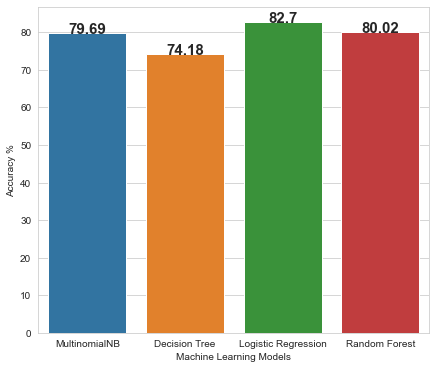

NameError: name 'pylab' is not defined

In [59]:
model = ['MultinomialNB',  'Decision Tree', 'Logistic Regression', 'Random Forest']
acc = [multinomialNB_accuracy, dct_accuracy, log_accuracy, rfc_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(7,6))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Machine Learning Models")
addlabels(model, acc)
sns.barplot(x= model, y= acc)
plt.show()
pylab.savefig('Final-Result-2.png')